# U.S. Medical Insurance Costs
## ___🛠️Work in progress🛠️___
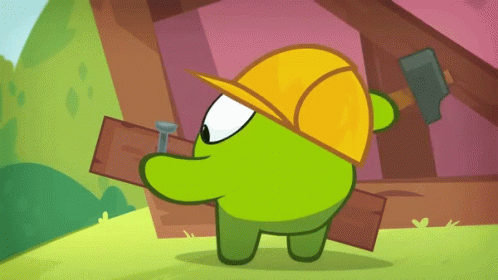

## 1. Overview<a id='overview'></a>
This project aims to showcase some investigative skills learnt so far (45% complete) through the Data Science Career Path on Codecademy. It will use a CSV file containing the dataset, which will be analyzed to come up with some findings and potential use-cases for this dataset.
## 2. Contents<a id='contents'></a>
1. [Overview](#overview)
2. [Contents](#contents)
3. [Data Types](#data-types)
4. [Problem](#problem)
5. [Goal](#goal)
6. [Actions](#actions)
7. [Analyses](#analyses)
    - [7.1 Males 🆚 Females](#males)
    - [7.2 Smokers🚬 and Non-smokers🚭](#smokers)
    - [7.3 Regions🗺️](#regions)
    - [7.4 With or without children👨‍👩‍👧‍👦](#children)
    - [7.5 Age Groups👴👶](#ages)
    - [7.6 BMIs](#bmi)
8. [Final comments](#comments)

## 3. Data Types<a id='data-types'></a>
Looking at the CSV file, it can be determined that all the data is stored as strings, but since the data contains numerical and categorical data, there is no need for the data to be strings. The data will be reformated as:
|     Name | Data Type | Attribute contains:              | Change to Data Type             |
|---------:|-----------|----------------------------------|---------------------------------|
| age      | string    | Nummerical values                | Integer                         |
| sex      | string    | Categorical values (male/female) | Boolean (male = 1 / female = 0) |
| bmi      | string    | Nummerical values with decimals  | Float                           |
| children | string    | Nummerical values                | Integer                         |
| smoker   | string    | Categorical values (yes/no)      | Boolean (yes = 1 / no = 0)      |
| region   | string    | Categorical values               | Keep as string                  |
| charges  | string    | Nummerical values with decimals  | Float                           |

## 4. Problem <a id='problem'></a>
We don't know how these different attributes affect or perhaps cooperatively affect peoples medical insurance charges.
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

## 5. Goal <a id='goal'></a>
We'd like to explore how lifestyle choices may affect ones medical insurance charges and be able to predict by how much a change in lifestyle may affect ones medical insurance charges. With this knowledge we want to help people making informed decisions
We also hope to strengthen the incentive for people to quit smoking and live a healthy lifestyle
## 6. Actions<a id='actions'></a>
- Suggestion on what an individual could do to diminish insurance costs
- Informing individuals considering having children on the associated medical insurance cost with having children.
## 7. Analysis<a id='analyses'></a>
### Descriptive analyses:
How well is the data representation balanced? Are there some limits to the data that has to be acknowledged and afects the validity of further investigation?
- Balance in male and female
- Balance in smokers and non-smokers
- Balance in regional representation
- Balance in individuals with kids and without
- Balance in age representation
- Balance in BMI representation

### Behaviour analyses
Indentifying the parameters that have the greatest effect on medical insurance charges, with consideration to how an individual can change its behaviour to lower medical insurance cost and help individuals making informed life choices 
- How does medical charges vary with age?
- How does medical charges vary with BMI?
- How does medical charges vary between smokers and non-smokers?
- How does medical charges vary between regions?
- How does medical charges vary between males and females?
- How does medical charges vary with the Nth child?

### Libraries imported and used in the project:

In [115]:
from statistics import mean, median  # Assuming mean and median are aliases for these
from collections import Counter  # Use Counter for efficient counting
import csv

In [117]:
# Columns from csv file is stored in separate lists
age_ls = []
sex_ls = []
bmi_ls = []
kids_ls = []
smoker_ls = []
region_ls = []
charges_ls = []
with open('insurance.csv', newline='') as csvfile:
    insurance_reader = csv.DictReader(csvfile)
    for row in insurance_reader:
        age_ls.append(int(row['age']))
        if row['sex'] == 'male':
            sex_ls.append(1)
        else:
            sex_ls.append(0)
        bmi_ls.append(float(row['bmi']))
        kids_ls.append(int(row['children']))
        if row['smoker'] == 'yes':
            smoker_ls.append(1)
        else:
            smoker_ls.append(0)
        region_ls.append(row['region'])
        charges_ls.append(float(row['charges']))

total_rows = len(age_ls)
print(total_rows)
# print(smoker_ls)

1338


### 7.1 Males 🆚 Females<a id='males'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [118]:
def male_vs_female(list):
    count_females = list.count(0)
    count_males = list.count(1)
    return count_females, count_males

male_n_female = male_vs_female(sex_ls)
print('This dataset contains', male_n_female[0], 'females and', male_n_female[1], 'males')
print('Females are represented with', str(round(male_n_female[0] / total_rows * 100, 2))+'% of the total population')
print('Males are represented with', str(round(male_n_female[1] / total_rows * 100, 2))+'% of the total population')

This dataset contains 662 females and 676 males
Females are represented with 49.48% of the total population
Males are represented with 50.52% of the total population


Fairly evenly representation of men and women

In [119]:

gender_charges = list(zip(sex_ls, charges_ls))
male_charges = []
female_charges = []
for sex, charge in gender_charges:
    if sex == 1:
        male_charges.append(charge)
    elif sex == 0:
        female_charges.append(charge)

print('Males have an average medical charge of', round(mean(male_charges), 2), 'and a median of', round(median(male_charges), 2))
print('Females have an average medical charge of', round(mean(female_charges), 2), 'and a median of', round(median(female_charges), 2))

Males have an average medical charge of 13956.75 and a median of 9369.62
Females have an average medical charge of 12569.58 and a median of 9412.96


Females seem to have a little lower cost of medical charges on average, but the medians show a slightly higher value for females than males, which means that the higher average male cost is probably due to a few individuals with a high cost not the bulk of the population. To investigate further one could display the data in a histogram, but I haven't learnt that yet.

### 7.2 Smokers🚬 and Non-smokers🚭<a id='smokers'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [120]:
def smoker_vs_non(list):
    count_smokers = list.count(1)
    count_non_smokers = list.count(0)
    return count_smokers, count_non_smokers

smokers = smoker_vs_non(smoker_ls)
print('This dataset contains', smokers[0], 'smokers and', smokers[1], 'non-smokers')
print('Smokers are represented with', str(round(smokers[0] / total_rows * 100, 2))+'% of the total population')
print('Non-smokers are represented with', str(round(smokers[1] / total_rows * 100, 2))+'% of the total population')

This dataset contains 274 smokers and 1064 non-smokers
Smokers are represented with 20.48% of the total population
Non-smokers are represented with 79.52% of the total population


In [121]:
smoke_charges = list(zip(smoker_ls, charges_ls))
smoker_charges = []
non_charges = []
for smoker, charge in smoke_charges:
    if smoker == 1:
        smoker_charges.append(charge)
    elif smoker == 0:
        non_charges.append(charge)

print('Smokers have an average medical charge of', round(mean(smoker_charges), 2), 'and a median of', round(median(smoker_charges), 2))
print('Non-smokers have an average medical charge of', round(mean(non_charges), 2), 'and a median of', round(median(non_charges), 2))

Smokers have an average medical charge of 32050.23 and a median of 34456.35
Non-smokers have an average medical charge of 8434.27 and a median of 7345.41


Smoking seems to have a significant effect

### 7.3 Regions🗺️<a id='regions'></a>
We don't know how many different regions the dataset contains, so we need a function that allows us to count the representation of each region regardless of how many different regions the dataset contains.
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [122]:
region_count = {}
def count_region(list):
    for region in list:
        region_count[region] = region_count.get(region, 0) + 1
    return region_count
    
region_rep = count_region(region_ls)
# print(region_rep, ' \n\r')
for region, value in region_rep.items():
    print('This dataset contains', value, 'people from the', region, 'region.')
    print(region.title(), 'is represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')

This dataset contains 325 people from the southwest region.
Southwest is represented with 24.29% of the total population. 

This dataset contains 364 people from the southeast region.
Southeast is represented with 27.2% of the total population. 

This dataset contains 325 people from the northwest region.
Northwest is represented with 24.29% of the total population. 

This dataset contains 324 people from the northeast region.
Northeast is represented with 24.22% of the total population. 



### ___🌟Cleaner🌟:___

In [123]:
def count_region(region_list):
  """Counts the frequency of each region in a list."""
  return Counter(region_list)  # Count occurrences efficiently

# Count regions
region_counts = count_region(region_ls)

# Print results with formatted percentages
for region, count in region_counts.items():
  percent = round(count / len(region_ls) * 100, 2)  # Calculate percentage directly
  print(f"This dataset contains {count} people from the {region} region.")
  print(f"{region.title()} is represented with {percent}% of the total population.\n")


This dataset contains 325 people from the southwest region.
Southwest is represented with 24.29% of the total population.

This dataset contains 364 people from the southeast region.
Southeast is represented with 27.2% of the total population.

This dataset contains 325 people from the northwest region.
Northwest is represented with 24.29% of the total population.

This dataset contains 324 people from the northeast region.
Northeast is represented with 24.22% of the total population.



In [124]:
region_charges = list(zip(region_ls, charges_ls))
southwest_charges = []
southeast_charges = []
northwest_charges = []
northeast_charges = []
for region, charge in region_charges:
    if region == 'southwest':
        southwest_charges.append(charge)
    elif region == 'southeast':
        southeast_charges.append(charge)
    elif region == 'northwest':
        northwest_charges.append(charge)
    elif region == 'northeast':
        northeast_charges.append(charge)

print('People from Southwest have an average medical charge of', round(mean(southwest_charges), 2), 'and a median of', round(median(southwest_charges), 2))
print('People from Southeast have an average medical charge of', round(mean(southeast_charges), 2), 'and a median of', round(median(southeast_charges), 2))
print('People from Northwest have an average medical charge of', round(mean(northwest_charges), 2), 'and a median of', round(median(northwest_charges), 2))
print('People from Northeast have an average medical charge of', round(mean(northeast_charges), 2), 'and a median of', round(median(northeast_charges), 2))

People from Southwest have an average medical charge of 12346.94 and a median of 8798.59
People from Southeast have an average medical charge of 14735.41 and a median of 9294.13
People from Northwest have an average medical charge of 12417.58 and a median of 8965.8
People from Northeast have an average medical charge of 13406.38 and a median of 10057.65


### ___🌟Cleaner🌟:___

In [125]:
region_charges = list(zip(region_ls, charges_ls))

# Separate charges by region using dictionary comprehension
charges_by_region = {region: [] for region in {'southwest', 'southeast', 'northwest', 'northeast'}}
for region, charge in region_charges:
  charges_by_region[region.lower()].append(charge)  # Ensure case-insensitivity

# Calculate and print statistics for each region
for region, charges in charges_by_region.items():
  if charges:  # Check if there are any charges for this region
    avg_charge = round(mean(charges), 2)
    median_charge = round(median(charges), 2)
    print(f"People from {region.title()} have an average medical charge of {avg_charge} and a median of {median_charge}")



People from Southwest have an average medical charge of 12346.94 and a median of 8798.59
People from Northeast have an average medical charge of 13406.38 and a median of 10057.65
People from Southeast have an average medical charge of 14735.41 and a median of 9294.13
People from Northwest have an average medical charge of 12417.58 and a median of 8965.8


### 7.4 With or without children👨‍👩‍👧‍👦<a id='children'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [126]:
kids_count = {}
# this function counts how many people have x-number of children
def count_kids(list):
    for num_kids in list:
        kids_count[num_kids] = kids_count.get(num_kids, 0) + 1
    return kids_count
    
kid_rep = count_kids(kids_ls)
kids_rep_sorted = sorted(kid_rep.items())
# print(kids_rep_sorted, ' \n\r')

for key, value in kids_rep_sorted:
    if key == '0':
        print('This dataset contains', value, 'people that has no kids.')
        print('People with no kids are represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')
    elif key == '1':
        print('This dataset contains', value, 'people that has', key, 'kid.')
        print('People with', key, 'kid are represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')
    else:
        print('This dataset contains', value, 'people that has', key, 'kids.')
        print('People with', key, 'kids are represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')


# this function counts how many people have children and how many do not
def count_parents(list):
    no_kids = 0
    has_kids = 0
    for num_kids in list:
        if num_kids == 0:
            no_kids += 1
        elif num_kids > 0:
            has_kids += 1
    return no_kids, has_kids
    
parent_rep = count_parents(kids_ls)

print('This dataset contains', parent_rep[0], 'people without kids and', parent_rep[1], 'with kids')
print('People without kids are represented with', str(round(parent_rep[0] / total_rows * 100, 2))+'% of the total population')
print('Parents are represented with', str(round(parent_rep[1] / total_rows * 100, 2))+'% of the total population')

This dataset contains 574 people that has 0 kids.
People with 0 kids are represented with 42.9% of the total population. 

This dataset contains 324 people that has 1 kids.
People with 1 kids are represented with 24.22% of the total population. 

This dataset contains 240 people that has 2 kids.
People with 2 kids are represented with 17.94% of the total population. 

This dataset contains 157 people that has 3 kids.
People with 3 kids are represented with 11.73% of the total population. 

This dataset contains 25 people that has 4 kids.
People with 4 kids are represented with 1.87% of the total population. 

This dataset contains 18 people that has 5 kids.
People with 5 kids are represented with 1.35% of the total population. 

This dataset contains 574 people without kids and 764 with kids
People without kids are represented with 42.9% of the total population
Parents are represented with 57.1% of the total population


### ___🌟Cleaner🌟:___

In [127]:
def count_children(kids_list):
  """Counts the number of people with each number of children."""
  return Counter(kids_list)  # Count occurrences efficiently

# Count the number of children for each person
children_counts = count_children(kids_ls)

# Print results with formatted percentages
for num_kids, count in children_counts.items():
  percent = round(count / len(kids_ls) * 100, 2)  # Calculate percentage directly
  if num_kids == 0:
    print(f"This dataset contains {count} people with no children.")
  else:
    print(f"This dataset contains {count} people with {num_kids} kid{'s' if num_kids > 1 else ''}.")
  print(f"People with {'no' if num_kids == 0 else num_kids} {'child' if num_kids == 1 else 'children'} are represented with {percent}% of the total population.\n")

# Calculate the number of parents and people without kids using sum
parents = sum(count for num_kids, count in children_counts.items() if num_kids > 0)
no_kids = len(kids_ls) - parents  # Faster way to calculate people without kids

print(f"This dataset contains {no_kids} people without children and {parents} with children")
print(f"People without children are represented with {round(no_kids / len(kids_ls) * 100, 2)}% of the total population")
print(f"Parents are represented with {round(parents / len(kids_ls) * 100, 2)}% of the total population")


This dataset contains 574 people with no children.
People with no children are represented with 42.9% of the total population.

This dataset contains 324 people with 1 kid.
People with 1 child are represented with 24.22% of the total population.

This dataset contains 157 people with 3 kids.
People with 3 children are represented with 11.73% of the total population.

This dataset contains 240 people with 2 kids.
People with 2 children are represented with 17.94% of the total population.

This dataset contains 18 people with 5 kids.
People with 5 children are represented with 1.35% of the total population.

This dataset contains 25 people with 4 kids.
People with 4 children are represented with 1.87% of the total population.

This dataset contains 574 people without children and 764 with children
People without children are represented with 42.9% of the total population
Parents are represented with 57.1% of the total population


In [128]:
child_charges = list(zip(kids_ls, charges_ls))
no_kids_charges = []
one_kid_charges = []
two_kid_charges = []
three_kid_charges = []
four_kid_charges = []
five_kid_charges = []
for num_kids, charge in child_charges:
    if num_kids == 0:
        no_kids_charges.append(charge)
    elif num_kids == 1:
        one_kid_charges.append(charge)
    elif num_kids == 2:
        two_kid_charges.append(charge)
    elif num_kids == 3:
        three_kid_charges.append(charge)
    elif num_kids == 4:
        four_kid_charges.append(charge)
    elif num_kids == 5:
        five_kid_charges.append(charge)

print('People with no kids have an average medical charge of', round(mean(no_kids_charges), 2), 'and a median of', round(median(no_kids_charges), 2))
print('People with 1 kid have an average medical charge of', round(mean(one_kid_charges), 2), 'and a median of', round(median(one_kid_charges), 2))
print('People with 2 kids have an average medical charge of', round(mean(two_kid_charges), 2), 'and a median of', round(median(two_kid_charges), 2))
print('People with 3 kids have an average medical charge of', round(mean(three_kid_charges), 2), 'and a median of', round(median(three_kid_charges), 2))
print('People with 4 kids have an average medical charge of', round(mean(four_kid_charges), 2), 'and a median of', round(median(four_kid_charges), 2))
print('People with 5 kids have an average medical charge of', round(mean(five_kid_charges), 2), 'and a median of', round(median(five_kid_charges), 2))

People with no kids have an average medical charge of 12365.98 and a median of 9856.95
People with 1 kid have an average medical charge of 12731.17 and a median of 8483.87
People with 2 kids have an average medical charge of 15073.56 and a median of 9264.98
People with 3 kids have an average medical charge of 15355.32 and a median of 10600.55
People with 4 kids have an average medical charge of 13850.66 and a median of 11033.66
People with 5 kids have an average medical charge of 8786.04 and a median of 8589.57


### ___🌟Cleaner🌟:___

In [129]:
# Combine lists into a dictionary with number of kids as keys
child_charges_dict = {num_kids: [] for num_kids in range(6)}  # 0 to 5 kids
for num_kids, charge in child_charges:
  child_charges_dict[num_kids].append(charge)

# Calculate and print statistics for each number of kids
for num_kids, charges in child_charges_dict.items():
  if charges:  # Check if there are any charges for this number of kids
    avg_charge = round(mean(charges), 2)
    median_charge = round(median(charges), 2)
    print(f"People with {num_kids} kid{'s' if num_kids > 1 else ''} have an average medical charge of {avg_charge} and a median of {median_charge}")

People with 0 kid have an average medical charge of 12365.98 and a median of 9856.95
People with 1 kid have an average medical charge of 12731.17 and a median of 8483.87
People with 2 kids have an average medical charge of 15073.56 and a median of 9264.98
People with 3 kids have an average medical charge of 15355.32 and a median of 10600.55
People with 4 kids have an average medical charge of 13850.66 and a median of 11033.66
People with 5 kids have an average medical charge of 8786.04 and a median of 8589.57


Unexpected that people with 5 kids have lower medical charges on average than the other groups. Though only 18 observations in the population were people with 5 kids, so this number is not necessarily telling much
It would however be interesting to dive down into what the reasons for this is - do fewer people with 5 kids smoke than rest of the population? Have a smaller BMI on average? Are they generally older or younger? \
Looking into the people with 5 kids below, the most prominent trend is that except one person non of them are smokers, and the one person of these 18 people has a significantly higher medical charge than the rest. \
One could dive deeper and compare number of children for only non-smokers to see if there would be a more linear relation between amount of children and medical costs.

In [130]:
all_together = list(zip(age_ls, sex_ls, bmi_ls, kids_ls, smoker_ls, region_ls, charges_ls))
for i in all_together:
    if i[3] == 5:
        print(i)

(19, 0, 28.6, 5, 0, 'southwest', 4687.797)
(31, 1, 28.5, 5, 0, 'northeast', 6799.458)
(20, 0, 37.0, 5, 0, 'southwest', 4830.63)
(25, 1, 23.9, 5, 0, 'southwest', 5080.096)
(45, 1, 24.31, 5, 0, 'southeast', 9788.8659)
(52, 0, 46.75, 5, 0, 'southeast', 12592.5345)
(49, 0, 31.9, 5, 0, 'southwest', 11552.904)
(33, 1, 42.4, 5, 0, 'southwest', 6666.243)
(33, 1, 33.44, 5, 0, 'southeast', 6653.7886)
(46, 1, 25.8, 5, 0, 'southwest', 10096.97)
(39, 0, 24.225, 5, 0, 'northwest', 8965.79575)
(39, 0, 34.32, 5, 0, 'southeast', 8596.8278)
(20, 1, 30.115, 5, 0, 'northeast', 4915.05985)
(39, 0, 18.3, 5, 1, 'southwest', 19023.26)
(41, 1, 29.64, 5, 0, 'northeast', 9222.4026)
(39, 0, 23.87, 5, 0, 'southeast', 8582.3023)
(28, 1, 24.3, 5, 0, 'southwest', 5615.369)
(43, 1, 25.52, 5, 0, 'southeast', 14478.33015)


### 7.5 Age Groups👴👶<a id='ages'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [131]:
#good to know what the max- and min age are to determine interval ranges
print(max(age_ls))
print(min(age_ls))

# This function counts each unique age
age_count = {}
def count_ages(list):
    for age in list:
        age_count[age] = age_count.get(age, 0) + 1
    return age_count
    
age_rep = count_ages(age_ls)
age_rep_sorted = sorted(age_rep.items())
# print(age_rep_sorted, ' \n\r')

# for key, value in age_rep_sorted:
#         print('This dataset contains', value, 'people that are', key, 'years old.')
#         print(str(key) + '-year-olds are represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')



# This function counts each age and put it into an interval
def count_age_intervals(list):
    age_intervals = {'18-19': 0, '20-24': 0, '25-29': 0, '30-34': 0, '35-39': 0, '40-44': 0, '45-49': 0, '50-54': 0, '55-59': 0, '60-64': 0}
    for age in list:
        if age < 20:
            age_intervals['18-19'] += 1
        elif age >= 20 and age < 25:
            age_intervals['20-24'] += 1
        elif age >= 25 and age < 30:
            age_intervals['25-29'] += 1
        elif age >= 30 and age < 35:
            age_intervals['30-34'] += 1
        elif age >= 35 and age < 40:
            age_intervals['35-39'] += 1
        elif age >= 40 and age < 45:
            age_intervals['40-44'] += 1
        elif age >= 45 and age < 50:
            age_intervals['45-49'] += 1
        elif age >= 50 and age < 55:
            age_intervals['50-54'] += 1
        elif age >= 55 and age < 60:
            age_intervals['55-59'] += 1
        elif age >= 60 and age < 65:
            age_intervals['60-64'] += 1
    return age_intervals
    
age_interval_counted = count_age_intervals(age_ls)

for age, value in age_interval_counted.items():
    print('This dataset contains', value, 'people in the age interval between', age)
    print('People between the age of:', age, 'is represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')

64
18
This dataset contains 137 people in the age interval between 18-19
People between the age of: 18-19 is represented with 10.24% of the total population. 

This dataset contains 141 people in the age interval between 20-24
People between the age of: 20-24 is represented with 10.54% of the total population. 

This dataset contains 139 people in the age interval between 25-29
People between the age of: 25-29 is represented with 10.39% of the total population. 

This dataset contains 132 people in the age interval between 30-34
People between the age of: 30-34 is represented with 9.87% of the total population. 

This dataset contains 125 people in the age interval between 35-39
People between the age of: 35-39 is represented with 9.34% of the total population. 

This dataset contains 135 people in the age interval between 40-44
People between the age of: 40-44 is represented with 10.09% of the total population. 

This dataset contains 144 people in the age interval between 45-49
Peopl

### ___🌟Cleaner🌟:___

In [132]:
# Get min and max age
min_age, max_age = min(age_ls), max(age_ls)

# Define age intervals (modify as needed)
age_intervals = {'18-19': 0, '20-24': 0, '25-29': 0, '30-34': 0, '35-39': 0, '40-44': 0, '45-49': 0, '50-54': 0, '55-59': 0, '60-64': 0}

# Count ages using Counter
age_counts = Counter(age_ls)

# Assign individuals to fitting age intervals
for age, count in age_counts.items():
  # Find the appropriate interval based on age
  for interval, _ in age_intervals.items():
    start_age, end_age = map(int, interval.split("-"))  # Extract start and end ages
    if start_age <= age < end_age + 1:  # Inclusive upper bound
      age_intervals[interval] += count
      break  # Exit the inner loop once an interval is found

# Calculate the total count
total_count = sum(age_intervals.values())

# Print results with formatted percentages
for interval, count in age_intervals.items():
  percent = round(count / total_count * 100, 2)
  print(f"This dataset contains {count} people in the age interval between {interval}.")
  print(f"People between the ages of {interval} are represented with {percent}% of the total population.\n")


This dataset contains 137 people in the age interval between 18-19.
People between the ages of 18-19 are represented with 10.24% of the total population.

This dataset contains 141 people in the age interval between 20-24.
People between the ages of 20-24 are represented with 10.54% of the total population.

This dataset contains 139 people in the age interval between 25-29.
People between the ages of 25-29 are represented with 10.39% of the total population.

This dataset contains 132 people in the age interval between 30-34.
People between the ages of 30-34 are represented with 9.87% of the total population.

This dataset contains 125 people in the age interval between 35-39.
People between the ages of 35-39 are represented with 9.34% of the total population.

This dataset contains 135 people in the age interval between 40-44.
People between the ages of 40-44 are represented with 10.09% of the total population.

This dataset contains 144 people in the age interval between 45-49.
Peop

In [133]:
age_charges = list(zip(age_ls, charges_ls))
just_legal_charges = []
think_theyre_invincibles_charges = []
quarter_life_crisis_charges = []
denial_deniers_charges = []
second_wind_seekers_charges = []
mid_life_meltdowners_charges = []
full_of_wine_charges = []
deniable_wrinkles_charges = []
medicare_musers_charges = []
social_security_savvy_charges = []
for age, charge in age_charges:
    if age < 20:
        just_legal_charges.append(charge)
    elif age >= 20 and age < 25:
        think_theyre_invincibles_charges.append(charge)
    elif age >= 25 and age < 30:
        quarter_life_crisis_charges.append(charge)
    elif age >= 30 and age < 35:
        denial_deniers_charges.append(charge)
    elif age >= 35 and age < 40:
        second_wind_seekers_charges.append(charge)
    elif age >= 40 and age < 45:
        mid_life_meltdowners_charges.append(charge)
    elif age >= 45 and age < 50:
        full_of_wine_charges.append(charge)
    elif age >= 50 and age < 55:
        deniable_wrinkles_charges.append(charge)
    elif age >= 55 and age < 60:
        medicare_musers_charges.append(charge)
    elif age >= 60 and age < 65:
        social_security_savvy_charges.append(charge)


print('People between the ages of 18-19 have an average medical charge of', round(mean(just_legal_charges), 2), 'and a median of', round(median(just_legal_charges), 2))
print('People between the ages of 20-24 have an average medical charge of', round(mean(think_theyre_invincibles_charges), 2), 'and a median of', round(median(think_theyre_invincibles_charges), 2))
print('People between the ages of 25-29 have an average medical charge of', round(mean(quarter_life_crisis_charges), 2), 'and a median of', round(median(quarter_life_crisis_charges), 2))
print('People between the ages of 30-34 have an average medical charge of', round(mean(denial_deniers_charges), 2), 'and a median of', round(median(denial_deniers_charges), 2))
print('People between the ages of 35-39 have an average medical charge of', round(mean(second_wind_seekers_charges), 2), 'and a median of', round(median(second_wind_seekers_charges), 2))
print('People between the ages of 40-44 have an average medical charge of', round(mean(mid_life_meltdowners_charges), 2), 'and a median of', round(median(mid_life_meltdowners_charges), 2))
print('People between the ages of 45-49 have an average medical charge of', round(mean(full_of_wine_charges), 2), 'and a median of', round(median(full_of_wine_charges), 2))
print('People between the ages of 50-54 have an average medical charge of', round(mean(deniable_wrinkles_charges), 2), 'and a median of', round(median(deniable_wrinkles_charges), 2))
print('People between the ages of 55-59 have an average medical charge of', round(mean(medicare_musers_charges), 2), 'and a median of', round(median(medicare_musers_charges), 2))
print('People between the ages of 60-64 have an average medical charge of', round(mean(social_security_savvy_charges), 2), 'and a median of', round(median(social_security_savvy_charges), 2))


People between the ages of 18-19 have an average medical charge of 8407.35 and a median of 2138.07
People between the ages of 20-24 have an average medical charge of 9598.2 and a median of 2755.02
People between the ages of 25-29 have an average medical charge of 9524.78 and a median of 4058.12
People between the ages of 30-34 have an average medical charge of 11223.89 and a median of 5136.37
People between the ages of 35-39 have an average medical charge of 12282.51 and a median of 6457.84
People between the ages of 40-44 have an average medical charge of 13922.74 and a median of 7639.42
People between the ages of 45-49 have an average medical charge of 14845.89 and a median of 9285.25
People between the ages of 50-54 have an average medical charge of 16869.02 and a median of 10923.93
People between the ages of 55-59 have an average medical charge of 16077.64 and a median of 12030.81
People between the ages of 60-64 have an average medical charge of 21248.02 and a median of 14255.4


### ___🌟Cleaner🌟:___

In [134]:
age_group_labels = {
    "18-19": "Just Legal",
    "20-24": "Think They're Invincible",
    "25-29": "Quarter Life Crisis",
    "30-34": "Denial Deniers",
    "35-39": "Second Wind Seekers",
    "40-44": "Mid-Life Meltdowners",
    "45-49": "Full of Wine",
    "50-54": "Deniable Wrinkles",
    "55-59": "Medicare Musers",
    "60-64": "Social Security Savvy",
}

age_charges = list(zip(age_ls, charges_ls))
age_group_charges = {}

# Sort age_charges based on age (assuming age is the first element in the tuple)
age_charges.sort(key=lambda x: x[0])

# Populate age_group_charges dictionary
for age, charge in age_charges:
  for age_group, label in age_group_labels.items():
    # Extract start and end ages as integers
    start_age, end_age = map(int, age_group.split("-"))
    if start_age <= age < end_age + 1:  # Inclusive upper bound
      age_group_charges.setdefault(age_group, []).append(charge)
      break  # Exit inner loop once age group is found


# Calculate and print results for each age group
for age_group, charges in age_group_charges.items():
  avg_charge = round(mean(charges), 2)
  med_charge = round(median(charges), 2)
  print(f"People between {age_group} ({age_group_labels[age_group]}) have an average medical charge of {avg_charge} and a median of {med_charge}")


People between 18-19 (Just Legal) have an average medical charge of 8407.35 and a median of 2138.07
People between 20-24 (Think They're Invincible) have an average medical charge of 9598.2 and a median of 2755.02
People between 25-29 (Quarter Life Crisis) have an average medical charge of 9524.78 and a median of 4058.12
People between 30-34 (Denial Deniers) have an average medical charge of 11223.89 and a median of 5136.37
People between 35-39 (Second Wind Seekers) have an average medical charge of 12282.51 and a median of 6457.84
People between 40-44 (Mid-Life Meltdowners) have an average medical charge of 13922.74 and a median of 7639.42
People between 45-49 (Full of Wine) have an average medical charge of 14845.89 and a median of 9285.25
People between 50-54 (Deniable Wrinkles) have an average medical charge of 16869.02 and a median of 10923.93
People between 55-59 (Medicare Musers) have an average medical charge of 16077.64 and a median of 12030.81
People between 60-64 (Social Secu

The means and medians of each age group show a clear increase of medical costs with increasing. Would be interesting to show this trend in a bar chart with a trendline.

### 7.6 BMIs<a id='bmi'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>

In [135]:
#good to know what the bmi max and -min is to determine interval ranges
print(max(bmi_ls))
print(min(bmi_ls))

# This function counts each bmi and put it into an interval
def count_bmi_intervals(list):
    bmi_intervals = {'15-19': 0, '20-24': 0, '25-29': 0, '30-34': 0, '35-39': 0, '40-44': 0, '45-49': 0, '50-54': 0}
    for bmi in list:
        if bmi < 20:
            bmi_intervals['15-19'] += 1
        elif bmi >= 20 and bmi < 25:
            bmi_intervals['20-24'] += 1
        elif bmi >= 25 and bmi < 30:
            bmi_intervals['25-29'] += 1
        elif bmi >= 30 and bmi < 35:
            bmi_intervals['30-34'] += 1
        elif bmi >= 35 and bmi < 40:
            bmi_intervals['35-39'] += 1
        elif bmi >= 40 and bmi < 45:
            bmi_intervals['40-44'] += 1
        elif bmi >= 45 and bmi < 50:
            bmi_intervals['45-49'] += 1
        elif bmi >= 50 and bmi < 55:
            bmi_intervals['50-54'] += 1
    return bmi_intervals
    
bmi_interval_counted = count_bmi_intervals(bmi_ls)

for bmi, value in bmi_interval_counted.items():
    print('This dataset contains', value, 'people with a BMI between', bmi)
    print('People with a BMI between :', bmi, 'is represented with', str(round(value / total_rows * 100, 2)) + '% of the total population. \n\r')

53.13
15.96
This dataset contains 41 people with a BMI between 15-19
People with a BMI between : 15-19 is represented with 3.06% of the total population. 

This dataset contains 204 people with a BMI between 20-24
People with a BMI between : 20-24 is represented with 15.25% of the total population. 

This dataset contains 386 people with a BMI between 25-29
People with a BMI between : 25-29 is represented with 28.85% of the total population. 

This dataset contains 391 people with a BMI between 30-34
People with a BMI between : 30-34 is represented with 29.22% of the total population. 

This dataset contains 225 people with a BMI between 35-39
People with a BMI between : 35-39 is represented with 16.82% of the total population. 

This dataset contains 71 people with a BMI between 40-44
People with a BMI between : 40-44 is represented with 5.31% of the total population. 

This dataset contains 17 people with a BMI between 45-49
People with a BMI between : 45-49 is represented with 1.27%

### ___🌟Cleaner🌟:___

In [136]:
# Get min and max BMI
min_bmi, max_bmi = min(bmi_ls), max(bmi_ls)

# Define BMI intervals (modify as needed)
bmi_intervals = {'15-19': 0, '20-24': 0, '25-29': 0, '30-34': 0, '35-39': 0, '40-44': 0, '45-49': 0, '50-54': 0}

# Count BMIs using Counter
bmi_counts = Counter(bmi_ls)

# Assign individuals to fitting BMI intervals
for bmi, count in bmi_counts.items():
  # Find the appropriate interval based on BMI
  for interval, _ in bmi_intervals.items():
    start_bmi, end_bmi = map(int, interval.split("-"))  # Extract start and end BMI
    if start_bmi <= bmi < end_bmi + 1:  # Inclusive upper bound
      bmi_intervals[interval] += count
      break  # Exit the inner loop once an interval is found

# Calculate the total count
total_count = sum(bmi_intervals.values())

# Print results with formatted percentages
for interval, count in bmi_intervals.items():
  percent = round(count / total_count * 100, 2)
  print(f"This dataset contains {count} people with a BMI between {interval}.")
  print(f"People with a BMI between {interval} are represented with {percent}% of the total population.\n")

This dataset contains 41 people with a BMI between 15-19.
People with a BMI between 15-19 are represented with 3.06% of the total population.

This dataset contains 204 people with a BMI between 20-24.
People with a BMI between 20-24 are represented with 15.25% of the total population.

This dataset contains 386 people with a BMI between 25-29.
People with a BMI between 25-29 are represented with 28.85% of the total population.

This dataset contains 391 people with a BMI between 30-34.
People with a BMI between 30-34 are represented with 29.22% of the total population.

This dataset contains 225 people with a BMI between 35-39.
People with a BMI between 35-39 are represented with 16.82% of the total population.

This dataset contains 71 people with a BMI between 40-44.
People with a BMI between 40-44 are represented with 5.31% of the total population.

This dataset contains 17 people with a BMI between 45-49.
People with a BMI between 45-49 are represented with 1.27% of the total popu

In [137]:
bmi_intervals = [
    "15-19",
    "20-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
]

bmi_charges = list(zip(bmi_ls, charges_ls))
bmi_interval_charges = {}

# Sort age_charges based on age (assuming age is the first element in the tuple)
bmi_charges.sort(key=lambda x: x[0])

# Populate age_group_charges dictionary
for bmi, charge in bmi_charges:
  for interval in bmi_intervals:
    # Extract start and end ages as integers
    start_bmi, end_bmi = map(int, interval.split("-"))
    if start_bmi <= bmi < end_bmi + 1:  # Inclusive upper bound
      bmi_interval_charges.setdefault(interval, []).append(charge)
      break  # Exit inner loop once age group is found


# Calculate and print results for each age group
for interval, charges in bmi_interval_charges.items():
  avg_charge = round(mean(charges), 2)
  med_charge = round(median(charges), 2)
  print(f"People with a BMI between {interval} have an average medical charge of {avg_charge} and a median of {med_charge}")


People with a BMI between 15-19 have an average medical charge of 8838.56 and a median of 6877.98
People with a BMI between 20-24 have an average medical charge of 10572.37 and a median of 8790.0
People with a BMI between 25-29 have an average medical charge of 10987.51 and a median of 8659.38
People with a BMI between 30-34 have an average medical charge of 14419.67 and a median of 9563.03
People with a BMI between 35-39 have an average medical charge of 17022.26 and a median of 11264.54
People with a BMI between 40-44 have an average medical charge of 16569.6 and a median of 9875.68
People with a BMI between 45-49 have an average medical charge of 17815.04 and a median of 9549.57
People with a BMI between 50-54 have an average medical charge of 16034.31 and a median of 2438.06


Although the mean and median here doesn't show a linear relationship with higher BMI's and increase in medical cost, but it seems show a gap from people with a BMI between 15-29 up to people with a BMI between 30-54. Which indicate that overweight does play into increased medical costs.

### 8. Final comments:<a id='comments'></a>
<div style="text-align: right"> <a href="#contents">Go to Contents</a> </div>
Acording to this dataset, smoking seems to cause the largest impact on the cost of medical charges, but other noteworthy influencers on medical costs are BMI, number of children, age and parenthood.
Sex and the region does not seem to affect the cost of medical charges significantly